 ## Numerical information extraction from image data

For this lab, we are going to use a basic shapes file. You can download it [here](https://drive.google.com/file/d/1btB70ALZzjIalBDr8-SPDAlwGouNDnOM/view?usp=sharing). Once you have the file you should be able to display it with the code below

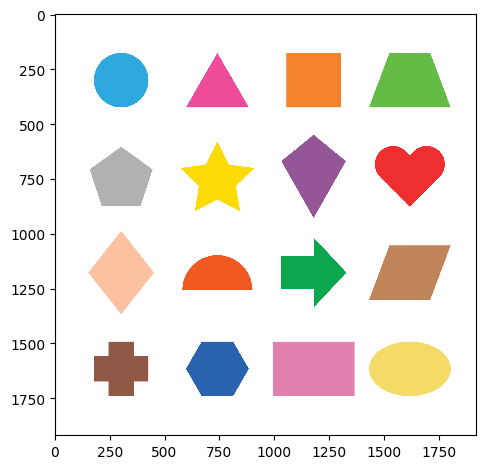

In [1]:
from skimage import io

shapes_image = io.imread('shapes.jpg')
io.imshow(shapes_image)

### Task 1 - Basic Measurements (5 marks)

For this task, we will try to extract different pieces of information from each shape. For example, area, perimeter and centroid. To do that, we will need to follow a series of steps.

**a)** Convert the image to grayscale (1 mark)

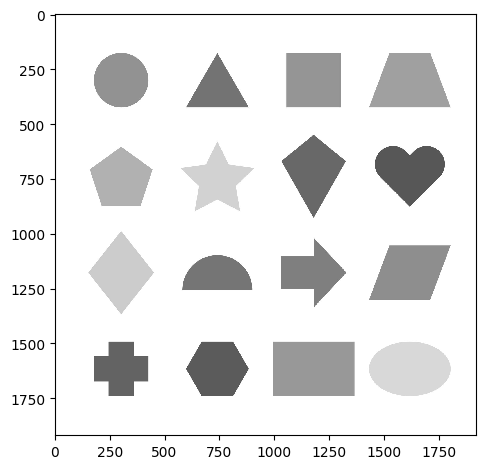

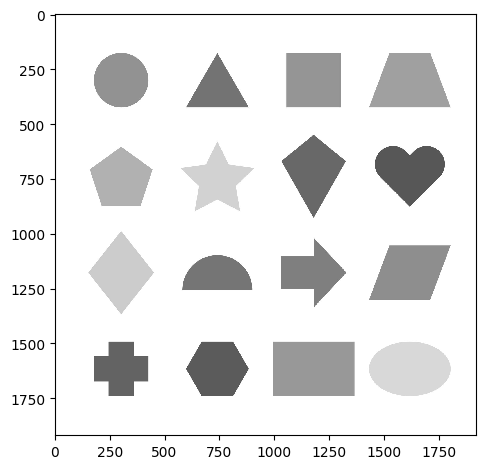

In [2]:
import skimage.color as color
grayscale_image1 = io.imread('shapes.jpg', as_gray=True)
grayscale_image = color.rgb2gray(shapes_image)
io.imshow(grayscale_image)
io.show()
# alternative
io.imshow(grayscale_image1)
io.show()

**b)** Identify a threshold to separate the images from the background. You can apply the [threshold_otsu](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu) method, but notice that it might not contain all the shapes. Try to work from it and identify a binary image that contains all the shapes (1 mark)

np.float64(0.7501636565563726)

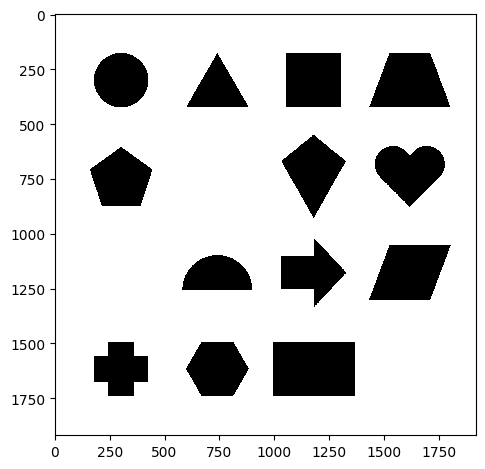

In [3]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(grayscale_image)
io.imshow(grayscale_image>threshold)
threshold

It seems the threshold returned by the otsu method needs adjustment. As the background is white (value =1) it will be easy to adjust correct the threshold manually just by increasing it. Alternatively we can observe in the histogram some elements near the .85 and use a higher than that threshold to include them. 

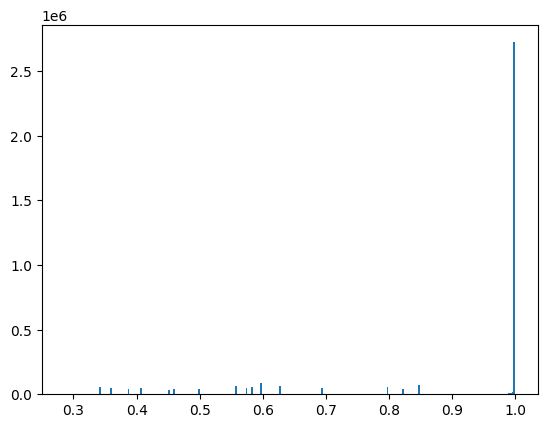

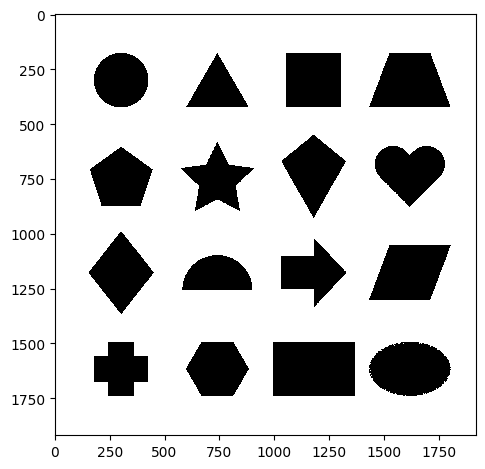

In [4]:
import matplotlib.pyplot as plt
plt.hist(grayscale_image.ravel(), bins=256)
plt.show()
io.imshow(grayscale_image >.85)
binary_image = grayscale_image >.85

**c)** Using the [`measure.label`](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) method, create a laballed image for your binary image in b). Note: you might need to use the `connectivity` parameter (1 mark)

C:\TUDublin\working-with-data\CA\CA2\WWDCA2\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


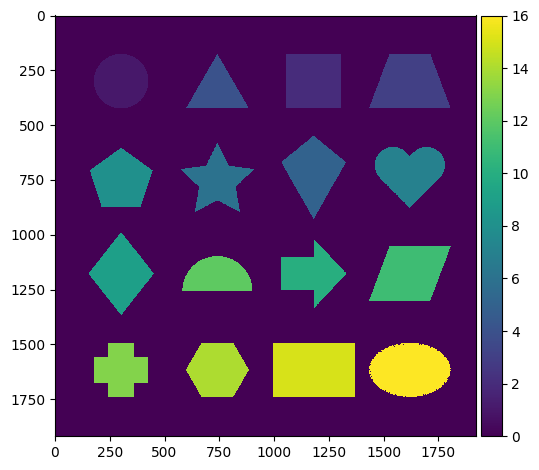

In [5]:
from skimage import measure
label_image = measure.label(binary_image, background=1, connectivity=2)
io.imshow(label_image)

**d)** Use the [`measure.regionprops`](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) passing the labelled image. This method will return a iterable object, with information about each labelled region in the image. Check what are the attributes of each object. Print area, perimeter and centroid. (1 mark)

In [6]:
regions = measure.regionprops(label_image)
import pandas as pd

attributes = [{'label': str(region.label), 
         'perimeter': region.perimeter, 
         'area': region.area, 
         'centroid.y0': region.centroid[0],
         'centroid.x0': region.centroid[1]} 
        for region in regions]

# Create the DataFrame
df_regions = pd.DataFrame(attributes)
df_regions
#print(df_regions.to_markdown(index=False, numalign="left", stralign="left"))

,label,perimeter,area,centroid.y0,centroid.x0
0,1,821.536147,48609.0,301.209735,301.224403
1,2,992.000000,62001.0,301.000000,1179.000000
2,3,1129.043723,69604.0,314.860281,1617.793618
3,4,899.050865,35842.0,342.454969,740.065035
4,5,1032.361615,56246.0,716.938307,1178.920777
5,6,1231.632647,45275.0,756.882187,740.065091
6,7,982.621500,58107.0,713.298656,1617.820314
7,8,924.648845,53661.0,754.407391,301.215091
8,9,1002.800215,56699.0,1178.925695,301.224078
9,10,1057.678282,46638.0,1178.951713,1168.511857


**e)** The label function won't return the labels in any specific order. To identify which shape corresponds to each region, use the centroid value again, and add the image number over the shape. A partial solution is given below. (1 mark)

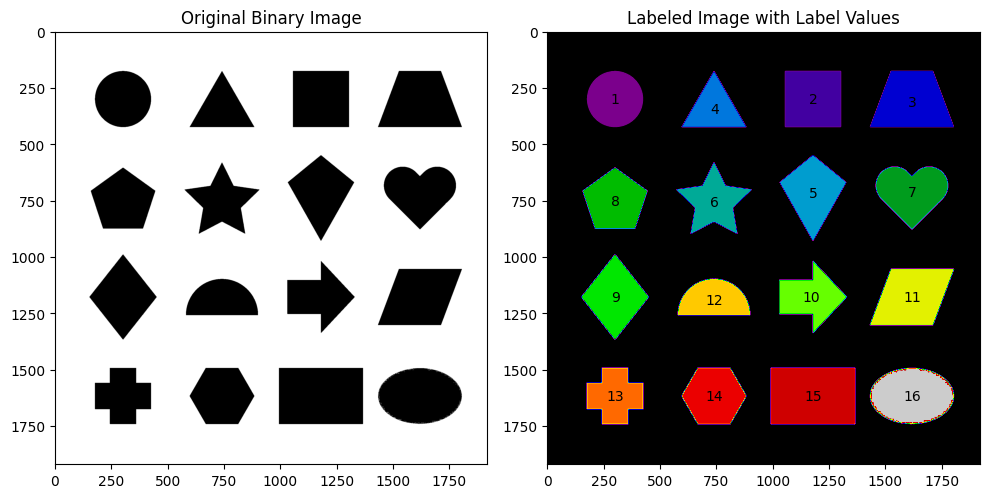

In [7]:
# Visualize the original binary image and the labeled image with label values
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original binary image
axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Original Binary Image')

# Labeled image with label values overlaid
axes[1].imshow(label_image, cmap='nipy_spectral')

# Annotate each labeled region with its label value
for region in measure.regionprops(label_image):
    y0, x0 = region.centroid
    # Add the region.label to axes[1] in the centroid coordinates
    axes[1].text(x0, y0, region.label, ha='center', va='center', color='black')

axes[1].set_title('Labeled Image with Label Values')

plt.tight_layout()
plt.show()

### Task 2 - Intensity Statistics (10 marks)

The mean intensity value of a single color channel provides information about the average brightness or intensity of that specific color within the image or a region of that image. The mean intensity value for a specific channel gives an average measure of the brightness of that color across the entire image. Let's have a look at intensity values for the previous shapes figure.

**a)** Note that in the original figure shapes have different colors. We are going to use `measure.regionprops` again to compute the mean and standard 
deviation intensity of pixel values for each region. You will need to do that for each color channel.

Hints: Use the `intensity_image` parameter of `regionprops` passing a image with a single color channel. To get a image with a single color channel you can slice the image for all rows and coluns, but a single color channel. Next, You can use the numpy methods `mean` and `std` to get the mean and std from the `intensity_image` attribute returned by regionprops object. (5 marks)

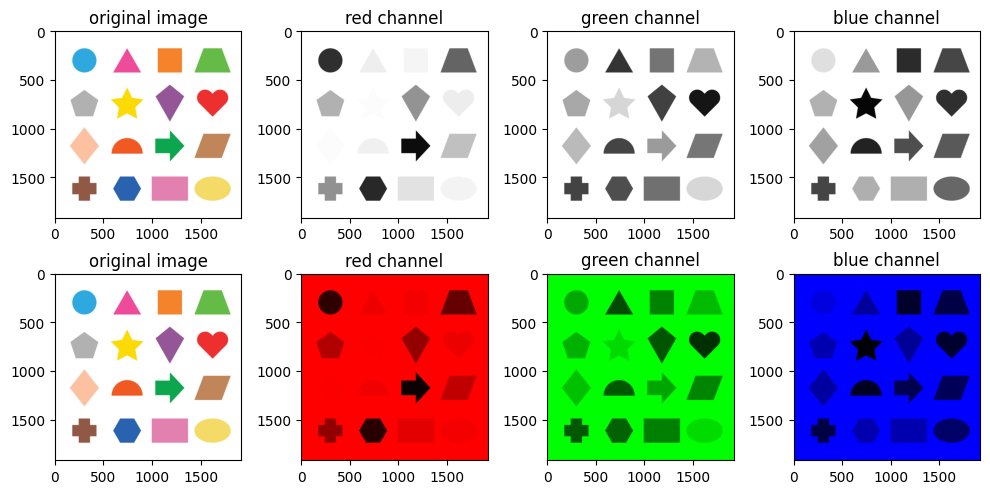

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes[0,0].set_title('original image')
axes[0,0].imshow(shapes_image, cmap='gray')

axes[1,0].set_title('original image')
axes[1,0].imshow(shapes_image, cmap='gray')

# print in grayscale
red_channel = shapes_image[:, :, 0] 
green_channel = shapes_image[:, :, 1]
blue_channel = shapes_image[:, :, 2]

axes[0,1].set_title('red channel')
axes[0,1].imshow(red_channel, cmap='gray')

axes[0,2].set_title('green channel')
axes[0,2].imshow(green_channel, cmap='gray')

axes[0,3].set_title('blue channel')
axes[0,3].imshow(blue_channel, cmap='gray')

# print in color
red = shapes_image.copy() 
red[:,:,1]=0
red[:,:,2]=0

green = shapes_image.copy()
green[:,:,0]=0
green[:,:,2]=0

blue = shapes_image.copy()
blue[:,:,0]=0
blue[:,:,1]=0

axes[1,1].set_title('red channel')
axes[1,1].imshow(red, cmap='gray')

axes[1,2].set_title('green channel')
axes[1,2].imshow(green, cmap='gray')

axes[1,3].set_title('blue channel')
axes[1,3].imshow(blue, cmap='gray')

plt.tight_layout()
plt.show()

In [9]:
def df_from_channel(channel):
    regions = measure.regionprops(label_image, channel)
    
    attributes = [{'label': region.label, 
            'ave': region.image_intensity.mean(),
            'std': region.image_intensity.std()} 
            for region in regions]
    
    # Create the DataFrame
    return pd.DataFrame(attributes)

df_red = df_from_channel(red_channel)
df_green = df_from_channel(green_channel)
df_blue = df_from_channel(blue_channel)

from IPython.display import display, HTML

display(HTML(f"""
<div style="display: flex; justify-content: space-around;">
    <div>red</div>
    <div>green</div>
    <div>blue</div>
</div>
<div style="display: flex; justify-content: space-around;">
    <div>{df_red.to_html(index=False)}</div>
    <div>{df_green.to_html(index=False)}</div>
    <div>{df_blue.to_html(index=False)}</div>
</div>
"""))


label,ave,std
1,37.549088,21.259808
2,245.051564,0.927008
3,75.601039,43.760845
4,119.909534,119.062592
5,74.809365,74.476835
6,108.373484,124.711289
7,155.457683,112.698194
8,123.164116,81.633263
9,126.378325,125.960331
10,6.918349,13.443488


**b)** Plot three bar charts (one for each color channel) comparing the mean intensity of all shapes. You can create a list with all the mean intensity values to use in the plot. (5 marks)



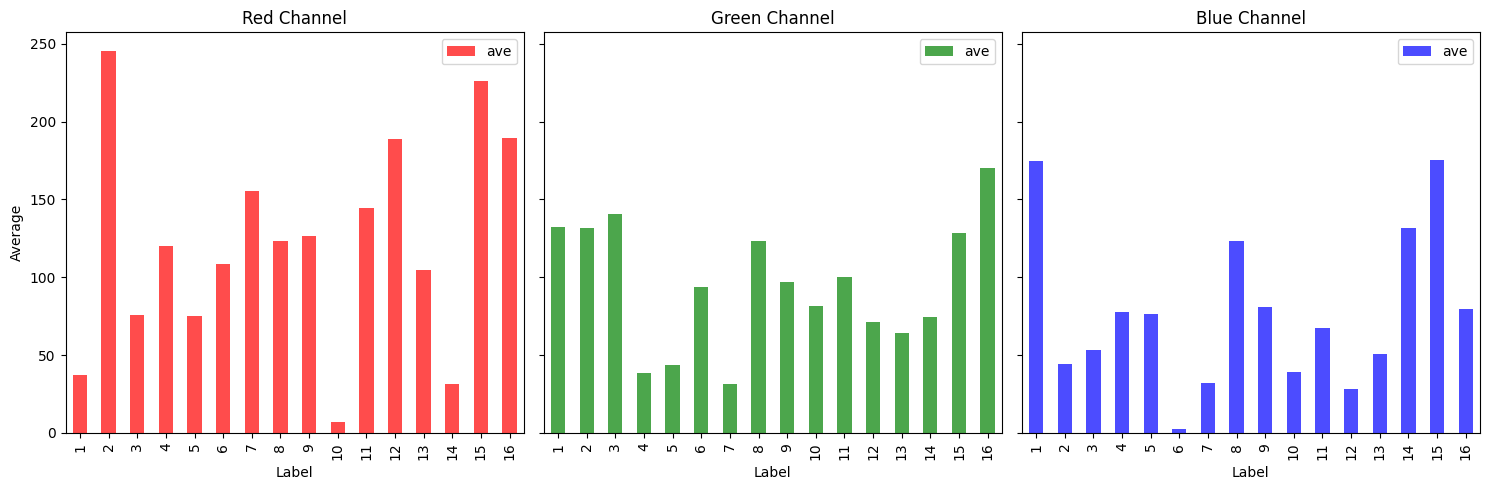

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
# Red Channel
df_red.plot(kind='bar', x='label', y='ave', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Red Channel')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Average')

# Green Channel
df_green.plot(kind='bar', x='label', y='ave', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Green Channel')
axes[1].set_xlabel('Label')

# Blue Channel
df_blue.plot(kind='bar', x='label', y='ave', ax=axes[2], color='blue', alpha=0.7)
axes[2].set_title('Blue Channel')
axes[2].set_xlabel('Label')

# Adjust layout
plt.tight_layout()
plt.show()


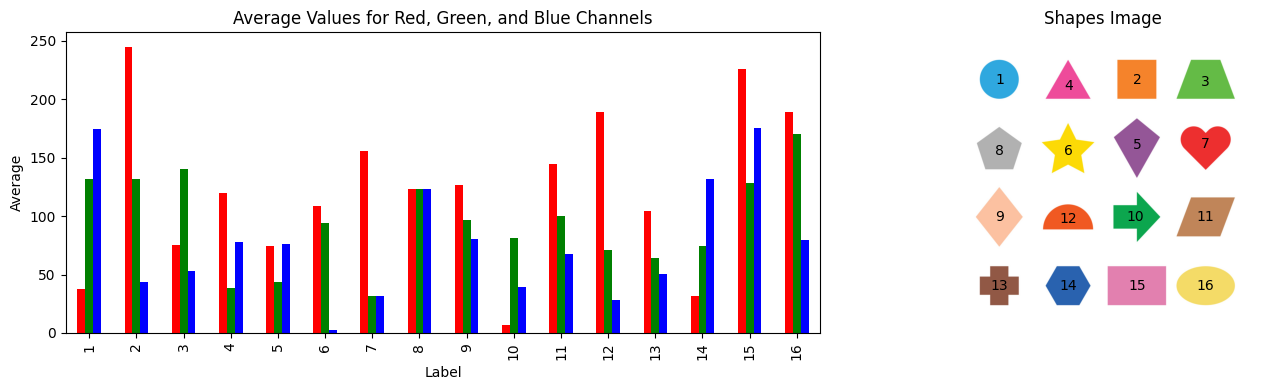

In [11]:
# Combine the DataFrames
df_combined = pd.DataFrame({
    'Red': df_red['ave'],
    'Green': df_green['ave'],
    'Blue': df_blue['ave'],
    'label': df_red['label']  # Use labels from any of the DataFrames
})

# Set the 'label' column as the index
df_combined = df_combined.set_index('label')

fig, ax = plt.subplots(1,2, figsize=(15, 4))

# Plot the bar chart
df_combined.plot(kind='bar', ax=ax[0], color={'Red': 'red', 'Green':'green', 'Blue':'blue'}, legend=False)
ax[0].set_title('Average Values for Red, Green, and Blue Channels')
ax[0].set_ylabel('Average')
ax[0].set_xlabel('Label')

# Display the image
ax[1].imshow(shapes_image)
ax[1].set_title('Shapes Image')
ax[1].axis('off')  # Hide axis ticks and labels for the image
for _, region in df_regions.iterrows():
    # Add the region.label to axes[1] in the centroid coordinates
    ax[1].text(region['centroid.x0'], region['centroid.y0'], region.label, ha='center', va='center', color='black')
# Adjust layout
plt.tight_layout()
plt.show()

### Task 3 - Histogram Analysis (10 marks)

Another way to evaluate pixel value information is by histograms.

**a)** Plot the histogram of pixel values in the red channel for each shape in the original image. We can use [exposure.histogram](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.histogram) method to extract the histogram array and bin centers of each histogram bin. (4 marks) 

Text(0.5, 1.0, 'histogram of red values')

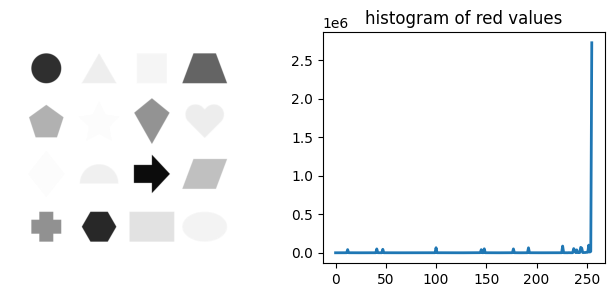

In [12]:
from skimage.exposure import histogram
hist, hist_centers = histogram(red_channel)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(red_channel, cmap=plt.cm.gray)
axes[0].set_axis_off()
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of red values')

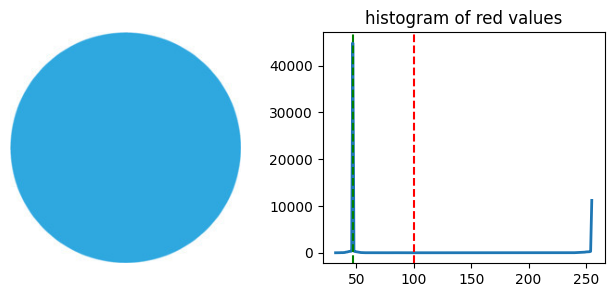

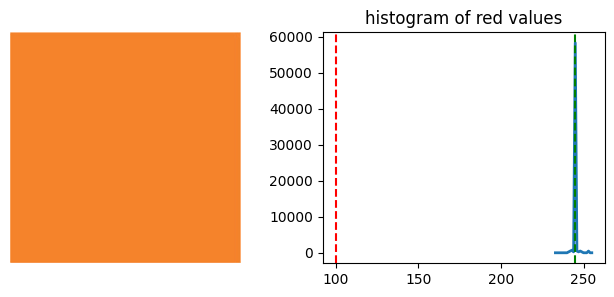

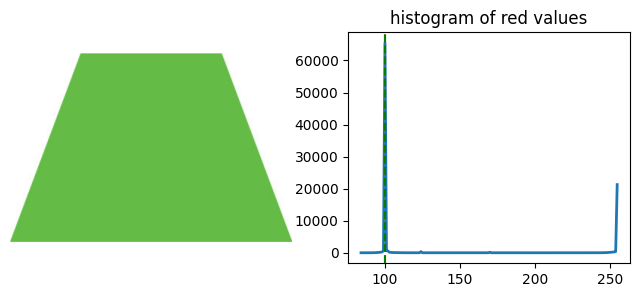

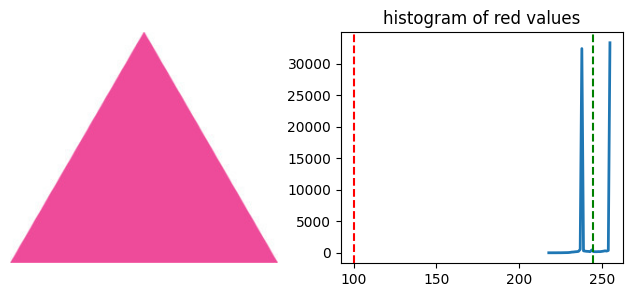

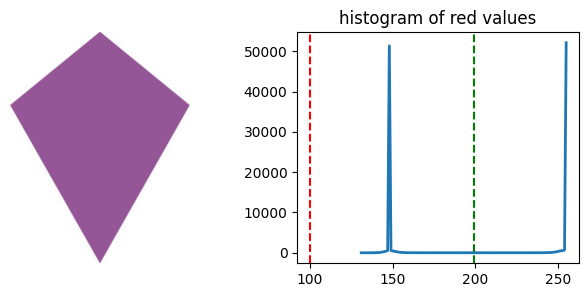

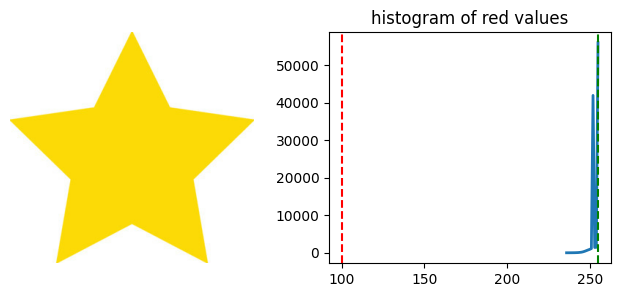

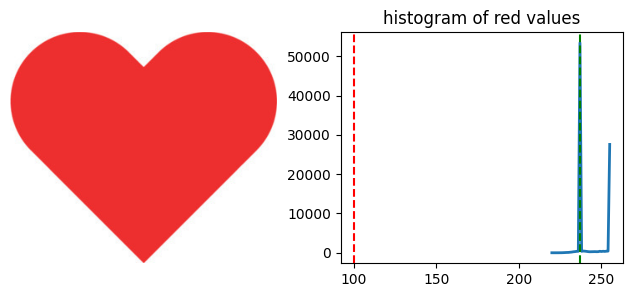

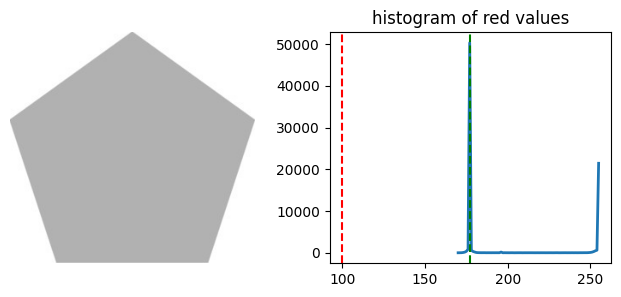

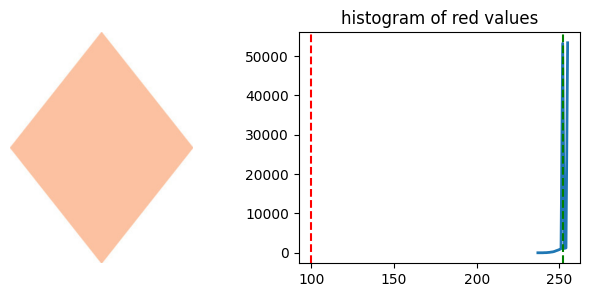

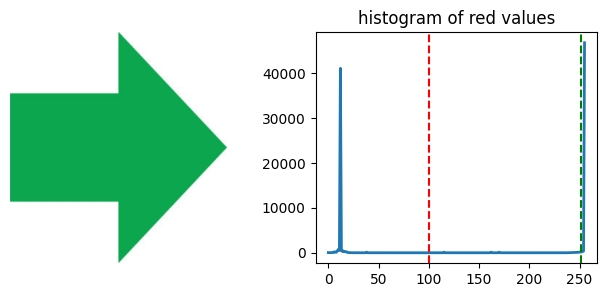

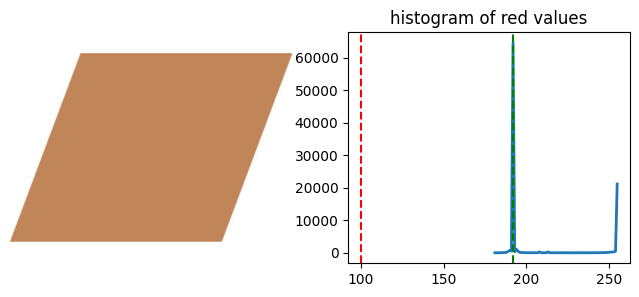

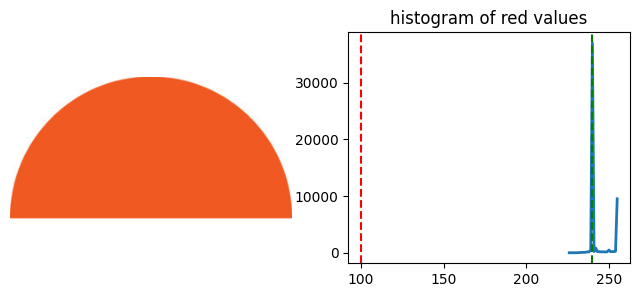

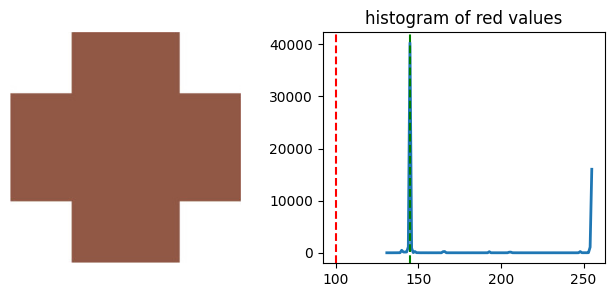

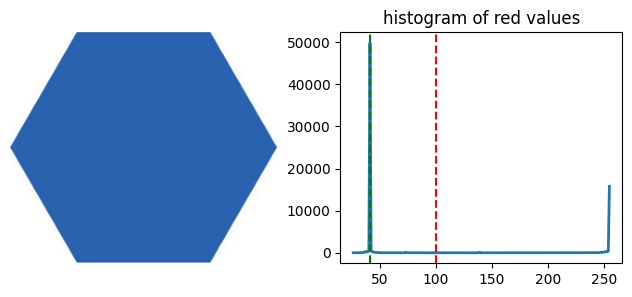

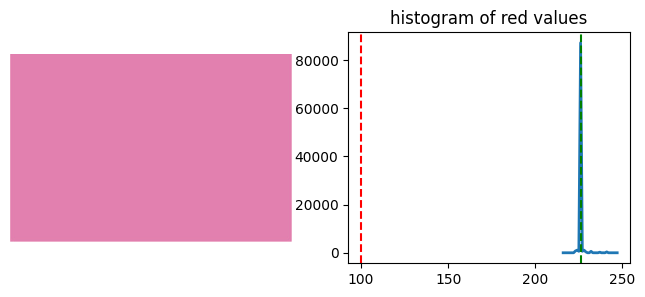

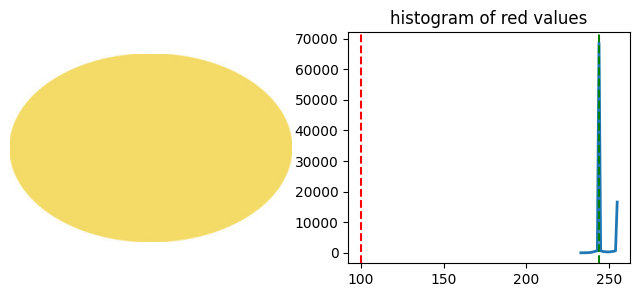

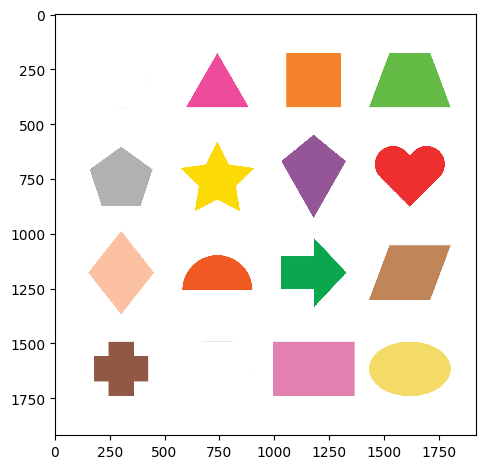

In [13]:
import numpy as np

def histogram_median(hist, hist_centers):
    data = []
    for center, frequency in zip(hist_centers, hist):
        data.extend([center] * frequency)
    return np.median(data)
    
def histogram_by_shape(region):
    bbox = region.bbox
    hist, hist_centers = histogram(red_channel[bbox[0]:bbox[2], bbox[1]:bbox[3]])
    median = histogram_median(hist, hist_centers)
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    axes[0].imshow(shapes_image[bbox[0]:bbox[2], bbox[1]:bbox[3]], cmap=plt.cm.gray)
    axes[0].set_axis_off()
    axes[1].plot(hist_centers, hist, lw=2)
    axes[1].set_title('histogram of red values')
    axes[1].axvline(x=100, color='r', linestyle='--')
    axes[1].axvline(x=median, color='g', linestyle='--', label=f'Median = {median}')
    plt.show()
    if median<100:
        high_requency_image[bbox[0]:bbox[2], bbox[1]:bbox[3]]=[255]
        
high_requency_image = shapes_image.copy()
for region in regions:
    histogram_by_shape(region) 
io.imshow(high_requency_image, cmap=plt.cm.gray)
io.show()


**b)** After analysing the histograms in a), modify the original shapes image and keep only the shapes with high frequency of strong red values (pixels from 100 to 255 with higher frequency in the red color channel).

You can check if the sum of frequencies in the histogram from index 0 up to 100 is lower than the sum of frequencies for indexes from 101 until 255. If they are, extract the bounding box of the region, with the [bbox](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) property of the region, and set all pixel values in the region to 255 (in all color channels).

Show the original image without the shapes with low frequency of strong red values.

Hint: the histogram might not have indexes up to 255. (4 marks)

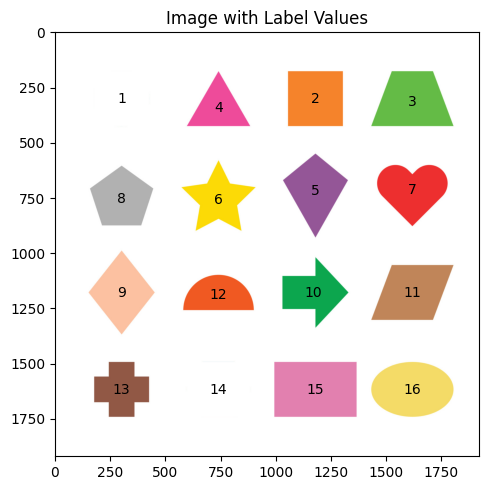

In [14]:
# Visualize the original binary image and the labeled image with label values
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Original binary image
axes.imshow(high_requency_image, cmap='gray')
axes.set_title('Original Image')

# Annotate each labeled region with its label value
for region in measure.regionprops(label_image):
    y0, x0 = region.centroid
    # Add the region.label to axes[1] in the centroid coordinates
    axes.text(x0, y0, region.label, ha='center', va='center', color='black')

axes.set_title('Image with Label Values')

plt.tight_layout()
plt.show()

**c)** Filtering shapes by the frequency of strong red values, is just way one of analysing the image. This should allow to create other custom metrics and identify reagions of interest in an image. For example, the ratio of the area of a region to its bounding box area can provide insights into how "compact" or "spread out" each labeled region is. Play with the previous exercise and attempt any custom metric of interest. (2 marks)

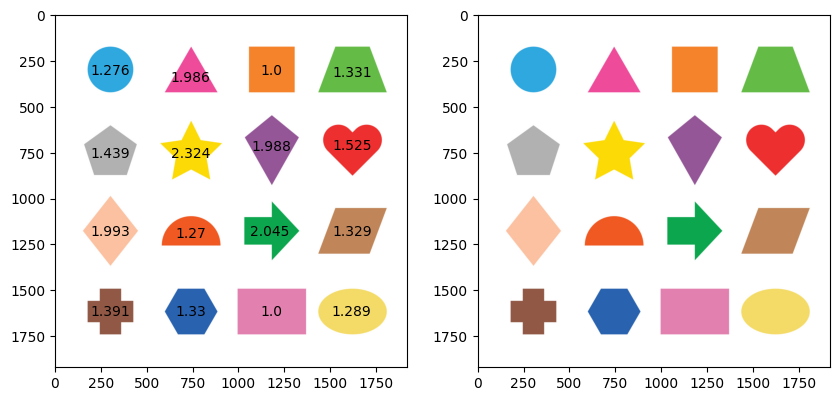

In [22]:
def filter_by_density(region):
    bbox = region.bbox
    hist, hist_centers = histogram(red_channel[bbox[0]:bbox[2], bbox[1]:bbox[3]])
    #if region.area_bbox/region.area<1.5:
     #   dense_image[bbox[0]:bbox[2], bbox[1]:bbox[3]]=[255]
dense_image = shapes_image.copy()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for region in regions:
    filter_by_density(region) 
    y0, x0 = region.centroid
    axes[0].text(x0, y0, round(region.area_bbox/region.area, 3), ha='center', va='center', color='black')
axes[0].imshow(shapes_image, cmap=plt.cm.gray)    
axes[1].imshow(dense_image, cmap=plt.cm.gray)
io.show()

### Task 4 - Report (5 marks)

Summarise the tasks you completed when working with the image file. Highlight any challenges faced and how you resolved them. Were there any skills or concepts more challenging and rewarding to learn in this lab?
